In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tabpfn
!pip  install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
# The steps are similar to "Result Analysis on Preprocessed Data (Accuracy, Precision, Recall, F1, Confusion Matrix).ipynb"
import pandas as pd
df_spark = pd.read_csv('/content/drive/MyDrive/ml_iot/DF_Spark2.csv')
df_spark.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [ ]:
df_spark = df_spark.drop(columns="Unnamed: 0")
df_spark.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [ ]:
df_spark['0'].value_counts()

7.0    347924
0.0      5780
4.0      1547
2.0       889
3.0       805
5.0       532
1.0       342
6.0       122
Name: 0, dtype: int64

In [ ]:
# df_spark['0'] = '6'

In [ ]:
# n_samples = 122
# df_list = []
# for lab in df_spark["0"].unique():
#     temp = df_spark[df_spark["0"] == lab].iloc[:n_samples]
#     df_list.append(temp.copy())

# df_spark2 = pd.concat(df_list, axis=0)
# df_spark2 = df_spark2.sample(frac=1)
# df_spark2["0"].value_counts()


In [ ]:
# df_spark2

In [ ]:
# df = df_spark.drop(df_spark[df_spark['0'] == 7].index)

In [ ]:
# df['0'].value_counts()

In [ ]:
# y = df_spark.iloc[:,0].values
# X = df_spark.iloc[:,1:].values

# # y = y[4000:8000]
# # X = X[4000:8000]

In [ ]:
# y = df_spark.iloc[:,0]
# X = df_spark.iloc[:,1:]

In [ ]:
# y = df_spark2.iloc[:,0].values
# X = df_spark2.iloc[:,1:].values

# # y = y[4000:8000]
# # X = X[4000:8000]

In [ ]:

# import numpy as np
# np.unique(y)
# from collections import Counter
# y_list = list(y)
# Counter(y_list)

In [ ]:
# from sklearn.preprocessing import label_binarize
# y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
# y, y.shape

In [ ]:
# n_classes = y.shape[1]
# n_classes

In [ ]:
# y = df_spark.iloc[:,0]
# X = df_spark.iloc[:,1:]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape # Size should be: ((286352, 11), (71589, 11), (286352, 8), (71589, 8))

## TabTransformer Setup

In [ ]:
!pip install -U pytorch_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.1 MB/s et

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import (
    CategoryEmbeddingModelConfig,
    FTTransformerConfig,
    TabNetModelConfig,
    GatedAdditiveTreeEnsembleConfig,
    TabTransformerConfig,
    AutoIntConfig
)
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.common.heads import LinearHeadConfig

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/usr/local/lib/python3.10/dist-packages/pytorch_tabular/models/mixture_density/mdn.py:25: UserWarning: Wandb not installed. WandbLogger will not work.
  warnings.warn("Wandb not installed. WandbLogger will not work.")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
cat_cols = []
num_cols = ['1', '2', '3', '4', '5', '6','7','8','9','10','11']
target = ['0']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df_spark, stratify=df_spark['0'], test_size=0.2, random_state=42)

In [ ]:
train.shape, test.shape

((286352, 12), (71589, 12))

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,10,11
109668,7.0,32.0,70.0,2.0,4.0,69.0,3.0,4.0,138.0,5.0,1.0,0.0000
31084,7.0,27.0,53.0,2.0,17.0,52.0,3.0,17.0,104.0,5.0,1.0,1.0000
79030,7.0,20.0,24.0,2.0,9.0,27.0,3.0,9.0,55.0,5.0,1.0,1.0000
83928,7.0,33.0,77.0,2.0,7.0,74.0,3.0,7.0,148.0,5.0,1.0,1.0000
7658,7.0,0.0,80.0,0.0,6.0,76.0,0.0,6.0,151.0,2.0,3.0,8.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
49843,7.0,0.0,80.0,0.0,6.0,76.0,0.0,6.0,152.0,3.0,1.0,0.0000
33911,7.0,4.0,15.0,0.0,5.0,15.0,0.0,5.0,29.0,2.0,1.0,9.0000
582,7.0,27.0,53.0,2.0,17.0,52.0,3.0,17.0,104.0,5.0,1.0,0.0000
58158,7.0,77.0,73.0,4.0,4.0,71.0,4.0,4.0,140.0,9.0,3.0,19.5085


# Models

Models that are experimented:
*   LGBM Classifier
*   CategoryEmbeddingModelConfig
*   FTTransformerConfig
*   TabNetModelConfig
*   GatedAdditiveTreeEnsembleConfig
*   TabTransformerConfig
*   AutoIntConfig




## LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder

# LightGBM needs categorical columns encoded as integers
train_enc = train.copy()
test_enc = test.copy()
for col in cat_cols:
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", encoded_missing_value=np.nan, unknown_value=np.nan)
    train_enc[col] = enc.fit_transform(train_enc[col].values.reshape(-1,1))
    test_enc[col] = enc.transform(test_enc[col].values.reshape(-1,1))

clf = LGBMClassifier(random_state=42)
clf.fit(train_enc.drop(columns=target[0]), train_enc[target], categorical_feature=cat_cols)
test_pred = clf.predict(test_enc.drop(columns=target[0]))
test_pred_proba = clf.predict_proba(test_enc.drop(columns=target[0]))

acc = accuracy_score(test[target[0]].values, test_pred)
loss = log_loss(test[target[0]].values, test_pred_proba)
print(f"Acc: {acc} | LogLoss: {loss}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 286352, number of used features: 11
[LightGBM] [Info] Start training from score -4.125962
[LightGBM] [Info] Start training from score -6.951849
[LightGBM] [Info] Start training from score -5.998305
[LightGBM] [Info] Start training from score -6.097278
[LightGBM] [Info] Start training from score -5.444533
[LightGBM] [Info] Start training from score -6.510538
[LightGBM] [Info] Start training from score -7.980010
[LightGBM] [Info] Start training from score -0.028386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Accuracy :  0.994803670955035
Precision :  [1.         1.         1.         1.         0.99678457 1.
 1.         0.99469667]
Recall:  [0.67906574 1.         1.         1.         1.         1.
 1.         0.99998563]
F1_score:  [0.80886141 1.         1.         1.         0.99838969 1.
 1.         0.99733414]
[[  785     0     0     0     0     0     0   371]
 [    0    68     0     0     0     0     0     0]
 [    0     0   178     0     0     0     0     0]
 [    0     0     0   161     0     0     0     0]
 [    0     0     0     0   310     0     0     0]
 [    0     0     0     0     0   106     0     0]
 [    0     0     0     0     0     0    24     0]
 [    0     0     0     0     1     0     0 69585]]
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81      1156
         1.0       1.00      1.00      1.00        68
         2.0       1.00      1.00      1.00       178
         3.0       1.00      1.00      1.00       161
        

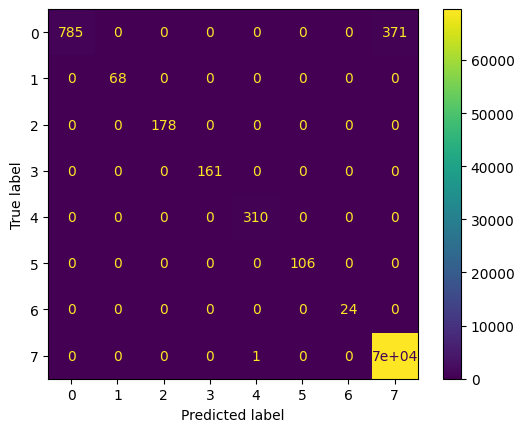

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


acc = accuracy_score(test[target[0]].values, test_pred)
loss = log_loss(test[target[0]].values, test_pred_proba)


precision = precision_score(test[target[0]].values, test_pred, average =None)
recall    = recall_score(test[target[0]].values, test_pred, average =None)
accuracy = accuracy_score(test[target[0]].values, test_pred)
f1 = f1_score(test[target[0]].values, test_pred, average =None)
print ('Accuracy : ', accuracy) # 0.994636058807373
print ('Precision : ', precision)
print ('Recall: ', recall)
print ('F1_score: ', f1)
print(confusion_matrix(test[target[0]].values, test_pred))
from sklearn.metrics import classification_report
print(classification_report(test[target[0]].values, test_pred))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=test[target[0]].values, y_pred=test_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1','2','3','4','5','6','7'])
vis.plot()
plt.show()


In [ ]:
y = df_spark.iloc[:,0]
X = df_spark.iloc[:,1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # Size should be: ((286352, 11), (71589, 11), (286352, 8), (71589, 8))

((286352, 11), (71589, 11), (286352,), (71589,))

In [ ]:

type(test_pred_proba), type(train_enc.drop(columns=target[0]))

(numpy.ndarray, pandas.core.frame.DataFrame)

In [ ]:

import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time


# clf = LGBMClassifier(random_state=42)
# clf.fit(train_enc.drop(columns=target[0]), train_enc[target], categorical_feature=cat_cols)
# test_pred = clf.predict(test_enc.drop(columns=target[0]))
# test_pred_proba = clf.predict_proba(test_enc.drop(columns=target[0]))


shap.initjs()
test_pred_proba = list(test_pred_proba)
explainer = shap.KernelExplainer(clf.predict_proba, train_enc.drop(columns=target[0]))
shap_values = explainer.shap_values(test_enc.drop(columns=target[0]))
shap.force_plot(explainer.expected_value[0], shap_values[0], test_enc.drop(columns=target[0]))

# shap_values = explainer.shap_values(test_enc.drop(columns=target[0]))
# shap.force_plot(explainer.expected_value[0], shap_values[0], test_enc.drop(columns=target[0]))

  0%|          | 0/71589 [00:00<?, ?it/s]

[Shap experiments](https://colab.research.google.com/drive/1iSLUaaQeMCRphE8uJLiRfuxgHqgDPYlG?usp=sharing)

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import (
    CategoryEmbeddingModelConfig,
    FTTransformerConfig,
    TabNetModelConfig,
    GatedAdditiveTreeEnsembleConfig,
    TabTransformerConfig,
    AutoIntConfig
)
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.common.heads import LinearHeadConfig

In [ ]:
data_config = DataConfig(
    target=target, #target should always be a list.
    continuous_cols=num_cols,
    categorical_cols=cat_cols,
)

trainer_config = TrainerConfig(
#     auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=256,
    max_epochs=500,
    early_stopping="valid_loss", # Monitor valid_loss for early stopping
    early_stopping_mode = "min", # Set the mode as min because for val_loss, lower is better
    early_stopping_patience=5, # No. of epochs of degradation training will wait before terminating
    checkpoints="valid_loss", # Save best checkpoint monitoring val_loss
    load_best=True, # After training, load the best checkpoint
)

optimizer_config = OptimizerConfig()

head_config = LinearHeadConfig(
    layers="", # No additional layer in head, just a mapping layer to output_dim
    dropout=0.1,
    initialization="kaiming"
).__dict__ # Convert to dict to pass to the model config (OmegaConf doesn't accept objects)

## CategoryEmbeddingModelConfig

In [ ]:
model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="64-32",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

In [ ]:
!python --version

In [ ]:
tabular_model.summary()

In [ ]:
y = df_spark.iloc[:,0]
X = df_spark.iloc[:,1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # Size should be: ((286352, 11), (71589, 11), (286352, 8), (71589, 8))
type(test_pred_proba), type(train_enc.drop(columns=target[0]))

import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time


# clf = LGBMClassifier(random_state=42)
# clf.fit(train_enc.drop(columns=target[0]), train_enc[target], categorical_feature=cat_cols)
# test_pred = clf.predict(test_enc.drop(columns=target[0]))
# test_pred_proba = clf.predict_proba(test_enc.drop(columns=target[0]))


shap.initjs()
test_pred_proba = list(test_pred_proba)

In [ ]:
clf.predict_proba

method

In [ ]:

explainer = shap.KernelExplainer(tabular_model.predict_proba, train_enc.drop(columns=target[0]))
shap_values = explainer.shap_values(test_enc.drop(columns=target[0]))
shap.force_plot(explainer.expected_value[0], shap_values[0], test_enc.drop(columns=target[0]))

# shap_values = explainer.shap_values(test_enc.drop(columns=target[0]))
# shap.force_plot(explainer.expected_value[0], shap_values[0], test_enc.drop(columns=target[0]))

AttributeError: ignored

(71589, 71589)

Accuracy :  0.9946360474374555
Precision :  [0.98494354 1.         1.         1.         0.99678457 1.
 1.         0.99469576]
Recall:  [0.67906574 1.         1.         1.         1.         1.
 1.         0.99981318]
F1_score:  [0.80389145 1.         1.         1.         0.99838969 1.
 1.         0.9972479 ]
[[  785     0     0     0     0     0     0   371]
 [    0    68     0     0     0     0     0     0]
 [    0     0   178     0     0     0     0     0]
 [    0     0     0   161     0     0     0     0]
 [    0     0     0     0   310     0     0     0]
 [    0     0     0     0     0   106     0     0]
 [    0     0     0     0     0     0    24     0]
 [   12     0     0     0     1     0     0 69573]]
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80      1156
         1.0       1.00      1.00      1.00        68
         2.0       1.00      1.00      1.00       178
         3.0       1.00      1.00      1.00       161
       

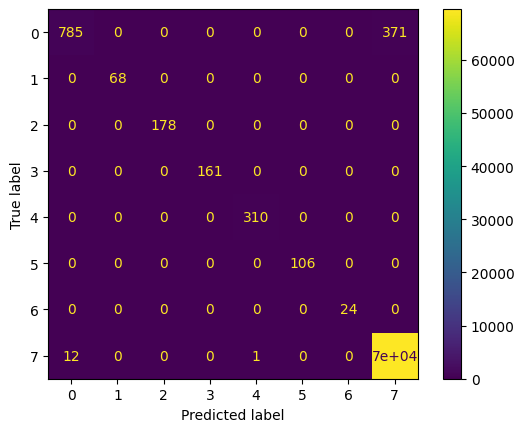

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

saved_preds = tabular_model.predict(test)
# print(saved_preds)
gold, predi = list(saved_preds['0'].values), list(saved_preds['prediction'].values)
print(len(gold), len(predi))

precision = precision_score(gold, predi, average =None)
recall    = recall_score(gold, predi, average =None)
accuracy = accuracy_score(gold, predi)
f1 = f1_score(gold, predi, average =None)
print ('Accuracy : ', accuracy) # 0.994636058807373
print ('Precision : ', precision)
print ('Recall: ', recall)
print ('F1_score: ', f1)
print(confusion_matrix(gold, predi))
from sklearn.metrics import classification_report
print(classification_report(gold, predi))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=gold, y_pred=predi)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1','2','3','4','5','6','7'])
vis.plot()
plt.show()

In [ ]:
# tabular_model.layers[0].set_weights(tabular_model.layers[0].get_weights())
# tabular_model.layers[1].set_weights(tabular_model.layers[1].get_weights())
# tabular_model.layers[2].set_weights(tabular_model.layers[2].get_weights())
# tabular_model.layers[3].set_weights(tabular_model.layers[3].get_weights())
# tabular_model.layers[4].set_weights(tabular_model.layers[4].get_weights())
# tabular_model.layers[5].set_weights(tabular_model.layers[5].get_weights())
# predicted_train1 = tabular_model.predict(X_train)

AttributeError: ignored

In [ ]:
# import shap
# # X_train2 = X_train[0:400]
# # X_train2 = X_train[:]
# explainer = shap.GradientExplainer(tabular_model, train)

NameError: ignored

In [ ]:

# X_test_2 = X_test[0:16]
# shap_values  = explainer.shap_values(X_test_2)

In [ ]:
# shap.initjs()

In [ ]:
# import pandas as pd
# features = ['address','function','length','setpoint','gain','reset rate','deadband','cycle time','rate','system mode','control scheme','pump','solenoid','pressure measurement','crc rate','command reponse']
# shap_values_2D = shap_values[0].reshape(-1,16)
# X_test_2D = X_test_2.reshape(-1,16)
# x_test_2d = pd.DataFrame(data=X_test_2D, columns = features)
# # x_test_2d.corr()
# shap.summary_plot(shap_values_2D, x_test_2d)

## GatedAdditiveTreeEnsembleConfig

In [ ]:
model_config = GatedAdditiveTreeEnsembleConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

Testing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280/280 0:00:32 • 0:00:00 8.67it/s

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9945522546768188     │
│         test_loss         │   0.012056429870426655    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.012056429870426655, 'test_accuracy': 0.9945522546768188}]

Generating Predictions... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:58

71589 71589
Accuracy :  0.9945522356786657
Precision :  [0.98370927 0.93150685 0.99431818 1.         1.         1.
 1.         0.99469553]
Recall:  [0.67906574 1.         0.98314607 1.         1.         1.
 1.         0.99977007]
F1_score:  [0.80348004 0.96453901 0.98870056 1.         1.         1.
 1.         0.99722634]
[[  785     0     0     0     0     0     0   371]
 [    0    68     0     0     0     0     0     0]
 [    0     3   175     0     0     0     0     0]
 [    0     0     0   161     0     0     0     0]
 [    0     0     0     0   310     0     0     0]
 [    0     0     0     0     0   106     0     0]
 [    0     0     0     0     0     0    24     0]
 [   13     2     1     0     0     0     0 69570]]
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80      1156
         1.0       0.93      1.00      0.96        68
         2.0       0.99      0.98      0.99       178
         3.0       1.00      1.00      1.00      

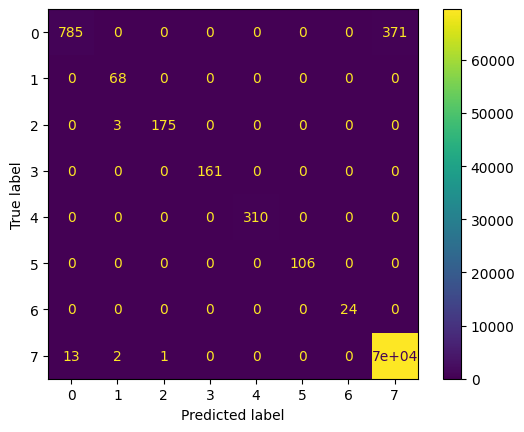

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

saved_preds = tabular_model.predict(test)
# print(saved_preds)
gold, predi = list(saved_preds['0'].values), list(saved_preds['prediction'].values)
print(len(gold), len(predi))

precision = precision_score(gold, predi, average =None)
recall    = recall_score(gold, predi, average =None)
accuracy = accuracy_score(gold, predi)
f1 = f1_score(gold, predi, average =None)
print ('Accuracy : ', accuracy) # 0.994636058807373
print ('Precision : ', precision)
print ('Recall: ', recall)
print ('F1_score: ', f1)
print(confusion_matrix(gold, predi))
from sklearn.metrics import classification_report
print(classification_report(gold, predi))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=gold, y_pred=predi)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1','2','3','4','5','6','7'])
vis.plot()
plt.show()

## FTTransformerConfig

In [ ]:
model_config = FTTransformerConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

Testing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280/280 0:00:08 • 0:00:00 31.69it/s

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9945801496505737     │
│         test_loss         │   0.011844197288155556    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.011844197288155556, 'test_accuracy': 0.9945801496505737}]

Generating Predictions... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:34

71589 71589
Accuracy :  0.9945801729315956
Precision :  [0.98370927 1.         0.99441341 1.         0.99041534 1.
 1.         0.99469545]
Recall:  [0.67906574 1.         1.         1.         1.         1.
 1.         0.9997557 ]
F1_score:  [0.80348004 1.         0.99719888 1.         0.99518459 1.
 1.         0.99721916]
[[  785     0     0     0     0     0     0   371]
 [    0    68     0     0     0     0     0     0]
 [    0     0   178     0     0     0     0     0]
 [    0     0     0   161     0     0     0     0]
 [    0     0     0     0   310     0     0     0]
 [    0     0     0     0     0   106     0     0]
 [    0     0     0     0     0     0    24     0]
 [   13     0     1     0     3     0     0 69569]]
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80      1156
         1.0       1.00      1.00      1.00        68
         2.0       0.99      1.00      1.00       178
         3.0       1.00      1.00      1.00      

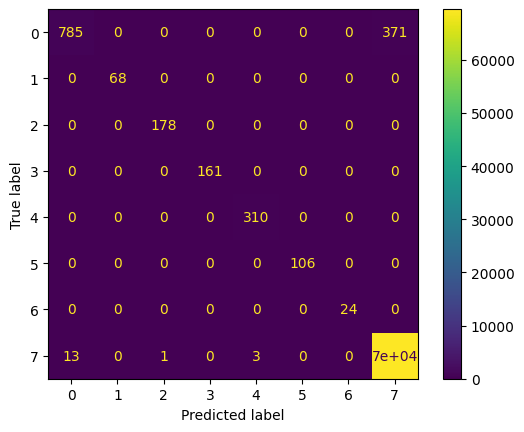

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

saved_preds = tabular_model.predict(test)
# print(saved_preds)
gold, predi = list(saved_preds['0'].values), list(saved_preds['prediction'].values)
print(len(gold), len(predi))

precision = precision_score(gold, predi, average =None)
recall    = recall_score(gold, predi, average =None)
accuracy = accuracy_score(gold, predi)
f1 = f1_score(gold, predi, average =None)
print ('Accuracy : ', accuracy) # 0.994636058807373
print ('Precision : ', precision)
print ('Recall: ', recall)
print ('F1_score: ', f1)
print(confusion_matrix(gold, predi))
from sklearn.metrics import classification_report
print(classification_report(gold, predi))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=gold, y_pred=predi)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1','2','3','4','5','6','7'])
vis.plot()
plt.show()

## TabTransformerConfig

In [ ]:
model_config = TabTransformerConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

Epoch 21/499 ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 277/1119 0:00:08 • 0:00:26 33.61it/s loss: 0.0572 train_loss: 0.089  
                                                                                   valid_loss: 0.054               
                                                                                   valid_accuracy: 0.987           
                                                                                   train_accuracy: 0.987           

Epoch 21/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 1055/1119 0:00:31 • 0:00:02 33.52it/s loss: 0.0513 train_loss: 0.081  
                                                                                   valid_loss: 0.054               
                                                                                   valid_accuracy: 0.987           
                                                                                   train_accuracy: 0.987           
Validation   ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 160/224   0:00:05 • 0:00:03 26.94it/s

Epoch 22/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 1004/1119 0:00:27 • 0:00:04 36.38it/s loss: 0.0597 train_loss: 0.084  
                                                                                   valid_loss: 0.054               
                                                                                   valid_accuracy: 0.989           
                                                                                   train_accuracy: 0.987           
Validation   ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 109/224   0:00:03 • 0:00:04 31.23it/s

Epoch 23/499 ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 298/1119 0:00:08 • 0:00:23 36.03it/s loss: 0.063 train_loss: 0.035   
                                                                                   valid_loss: 0.053               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.987           

Epoch 25/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 929/1119 0:00:26 • 0:00:06 34.85it/s loss: 0.0423 train_loss: 0.022  
                                                                                   valid_loss: 0.053               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.988           
Validation   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34/224   0:00:01 • 0:00:08 27.04it/s

Epoch 25/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 1051/1119 0:00:31 • 0:00:03 33.71it/s loss: 0.0423 train_loss: 0.022  
                                                                                   valid_loss: 0.053               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.988           
Validation   ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 156/224   0:00:05 • 0:00:03 27.55it/s

Epoch 29/499 ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 342/1119 0:00:08 • 0:00:21 38.72it/s loss: 0.0599 train_loss: 0.093  
                                                                                   valid_loss: 0.052               
                                                                                   valid_accuracy: 0.989           
                                                                                   train_accuracy: 0.988           

2023-08-29 18:41:27,495 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-29 18:41:27,499 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9891743063926697     │
│         test_loss         │    0.05357293412089348    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.05357293412089348, 'test_accuracy': 0.9891743063926697}]

Output()

71589 71589


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy :  0.9891743144896562
Precision :  [0.96555966 1.         0.98192771 0.96470588 0.89473684 0.
 0.85714286 0.98979679]
Recall:  [0.67906574 0.51470588 0.91573034 0.50931677 0.5483871  0.
 1.         0.99955451]
F1_score:  [0.79735907 0.67961165 0.94767442 0.66666667 0.68       0.
 0.92307692 0.99465172]
[[  785     0     0     0     0     0     0   371]
 [    0    35     0     0     0     0     0    33]
 [    0     0   163     0     0     0     0    15]
 [    0     0     0    82     0     0     0    79]
 [    0     0     1     3   170     0     3   133]
 [    0     0     0     0    20     0     0    86]
 [    0     0     0     0     0     0    24     0]
 [   28     0     2     0     0     0     1 69555]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80      1156
         1.0       1.00      0.51      0.68        68
         2.0       0.98      0.92      0.95       178
         3.0       0.96      0.51      0.67       161
         4.0       0.89      0.55      0.68       310
         5.0       0.00      0.00      0.00       106
         6.0       0.86      1.00      0.92        24
         7.0       0.99      1.00      0.99     69586

    accuracy                           0.99     71589
   macro avg       0.83      0.65      0.71     71589
weighted avg       0.99      0.99      0.99     71589



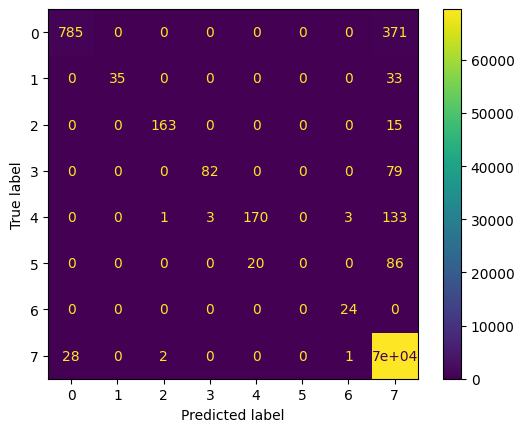

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

saved_preds = tabular_model.predict(test)
# print(saved_preds)
gold, predi = list(saved_preds['0'].values), list(saved_preds['prediction'].values)
print(len(gold), len(predi))

precision = precision_score(gold, predi, average =None)
recall    = recall_score(gold, predi, average =None)
accuracy = accuracy_score(gold, predi)
f1 = f1_score(gold, predi, average =None)
print ('Accuracy : ', accuracy) # 0.994636058807373
print ('Precision : ', precision)
print ('Recall: ', recall)
print ('F1_score: ', f1)
print(confusion_matrix(gold, predi))
from sklearn.metrics import classification_report
print(classification_report(gold, predi))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=gold, y_pred=predi)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1','2','3','4','5','6','7'])
vis.plot()
plt.show()

## AutoIntConfig

In [ ]:
model_config = AutoIntConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

2023-08-29 18:41:36,370 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-08-29 18:41:36,414 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-08-29 18:41:36,439 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
2023-08-29 18:41:36,636 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: AutoIntModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: AutoIntModel
/usr/local/lib/python3.10/dist-packages/pytorch_tabular/models/base_model.py:140: UserWarning: Wandb is not installed. Please install wandb to log logits. You can install wandb using pip install wandb or install PyTorch

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ AutoIntBackbone  │ 13.8 K │
│ 1 │ _embedding_layer │ Embedding2dLayer │    374 │
│ 2 │ _head            │ LinearHead       │  2.8 K │
│ 3 │ loss             │ CrossEntropyLoss │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 17.0 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 17.0 K                                                                                               
Total estimated model params size (MB): 0

Output()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('valid_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('valid_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('train_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

2023-08-29 18:52:34,662 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-29 18:52:34,666 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9945382475852966     │
│         test_loss         │   0.012304659932851791    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.012304659932851791, 'test_accuracy': 0.9945382475852966}]

Output()

71589 71589
Accuracy :  0.9945382670522007
Precision :  [0.98370927 1.         1.         1.         0.99029126 1.
 1.         0.99463864]
Recall:  [0.67906574 1.         1.         1.         0.98709677 1.
 1.         0.99977007]
F1_score:  [0.80348004 1.         1.         1.         0.98869144 1.
 1.         0.99719776]
[[  785     0     0     0     0     0     0   371]
 [    0    68     0     0     0     0     0     0]
 [    0     0   178     0     0     0     0     0]
 [    0     0     0   161     0     0     0     0]
 [    0     0     0     0   306     0     0     4]
 [    0     0     0     0     0   106     0     0]
 [    0     0     0     0     0     0    24     0]
 [   13     0     0     0     3     0     0 69570]]
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80      1156
         1.0       1.00      1.00      1.00        68
         2.0       1.00      1.00      1.00       178
         3.0       1.00      1.00      1.00      

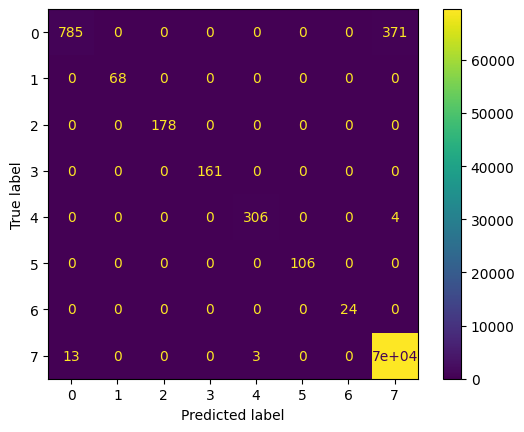

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

saved_preds = tabular_model.predict(test)
# print(saved_preds)
gold, predi = list(saved_preds['0'].values), list(saved_preds['prediction'].values)
print(len(gold), len(predi))

precision = precision_score(gold, predi, average =None)
recall    = recall_score(gold, predi, average =None)
accuracy = accuracy_score(gold, predi)
f1 = f1_score(gold, predi, average =None)
print ('Accuracy : ', accuracy) # 0.994636058807373
print ('Precision : ', precision)
print ('Recall: ', recall)
print ('F1_score: ', f1)
print(confusion_matrix(gold, predi))
from sklearn.metrics import classification_report
print(classification_report(gold, predi))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=gold, y_pred=predi)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1','2','3','4','5','6','7'])
vis.plot()
plt.show()

## TabNetModel

In [ ]:
model_config = TabNetModelConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

2023-08-29 18:52:49,212 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-08-29 18:52:49,261 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-08-29 18:52:49,293 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
2023-08-29 18:52:49,518 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: TabNetModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabNetModel
/usr/local/lib/python3.10/dist-packages/pytorch_tabular/models/base_model.py:140: UserWarning: Wandb is not installed. Please install wandb to log logits. You can install wandb using pip install wandb or install PyTorch T

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity         │      0 │
│ 1 │ _backbone        │ TabNetBackbone   │  6.4 K │
│ 2 │ _head            │ Identity         │      0 │
│ 3 │ loss             │ CrossEntropyLoss │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 6.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 6.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('valid_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('valid_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('train_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

2023-08-29 19:16:55,389 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-29 19:16:55,392 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9944963455200195     │
│         test_loss         │   0.011943981051445007    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.011943981051445007, 'test_accuracy': 0.9944963455200195}]

Output()

71589 71589
Accuracy :  0.9944963611728059
Precision :  [0.98125    1.         1.         1.         0.98101266 0.99065421
 0.96       0.99469523]
Recall:  [0.67906574 1.         0.98314607 1.         1.         1.
 1.         0.99971259]
F1_score:  [0.80265849 1.         0.99150142 1.         0.99041534 0.99530516
 0.97959184 0.99719759]
[[  785     0     0     0     0     0     0   371]
 [    0    68     0     0     0     0     0     0]
 [    0     0   175     0     3     0     0     0]
 [    0     0     0   161     0     0     0     0]
 [    0     0     0     0   310     0     0     0]
 [    0     0     0     0     0   106     0     0]
 [    0     0     0     0     0     0    24     0]
 [   15     0     0     0     3     1     1 69566]]
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80      1156
         1.0       1.00      1.00      1.00        68
         2.0       1.00      0.98      0.99       178
         3.0       1.00      1.00

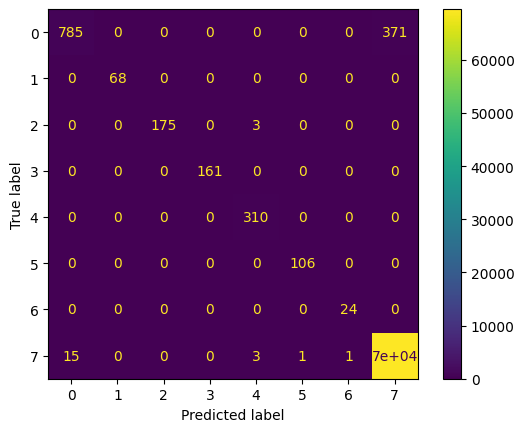

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

saved_preds = tabular_model.predict(test)
# print(saved_preds)
gold, predi = list(saved_preds['0'].values), list(saved_preds['prediction'].values)
print(len(gold), len(predi))

precision = precision_score(gold, predi, average =None)
recall    = recall_score(gold, predi, average =None)
accuracy = accuracy_score(gold, predi)
f1 = f1_score(gold, predi, average =None)
print ('Accuracy : ', accuracy) # 0.994636058807373
print ('Precision : ', precision)
print ('Recall: ', recall)
print ('F1_score: ', f1)
print(confusion_matrix(gold, predi))
from sklearn.metrics import classification_report
print(classification_report(gold, predi))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=gold, y_pred=predi)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1','2','3','4','5','6','7'])
vis.plot()
plt.show()

## GatedTransformer (Not working)

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=70646ff9e0ca60a3291305f6a08a6a06e35cbdce577478ba4eed7f3d342aa68e
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
!pip install tsai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from torchviz import make_dot

from fastcore.test import test_eq
from fastcore.basics import first
from fastai.data.external import untar_data, URLs
from fastai.tabular.data import TabularDataLoaders
from fastai.tabular.core import Categorify, FillMissing
from fastai.data.transforms import Normalize

# from tsai.all import *
# from tsai.models.GatedTabTransformer import GatedTabTransformer

import warnings
warnings.filterwarnings('ignore')

<Axes: >

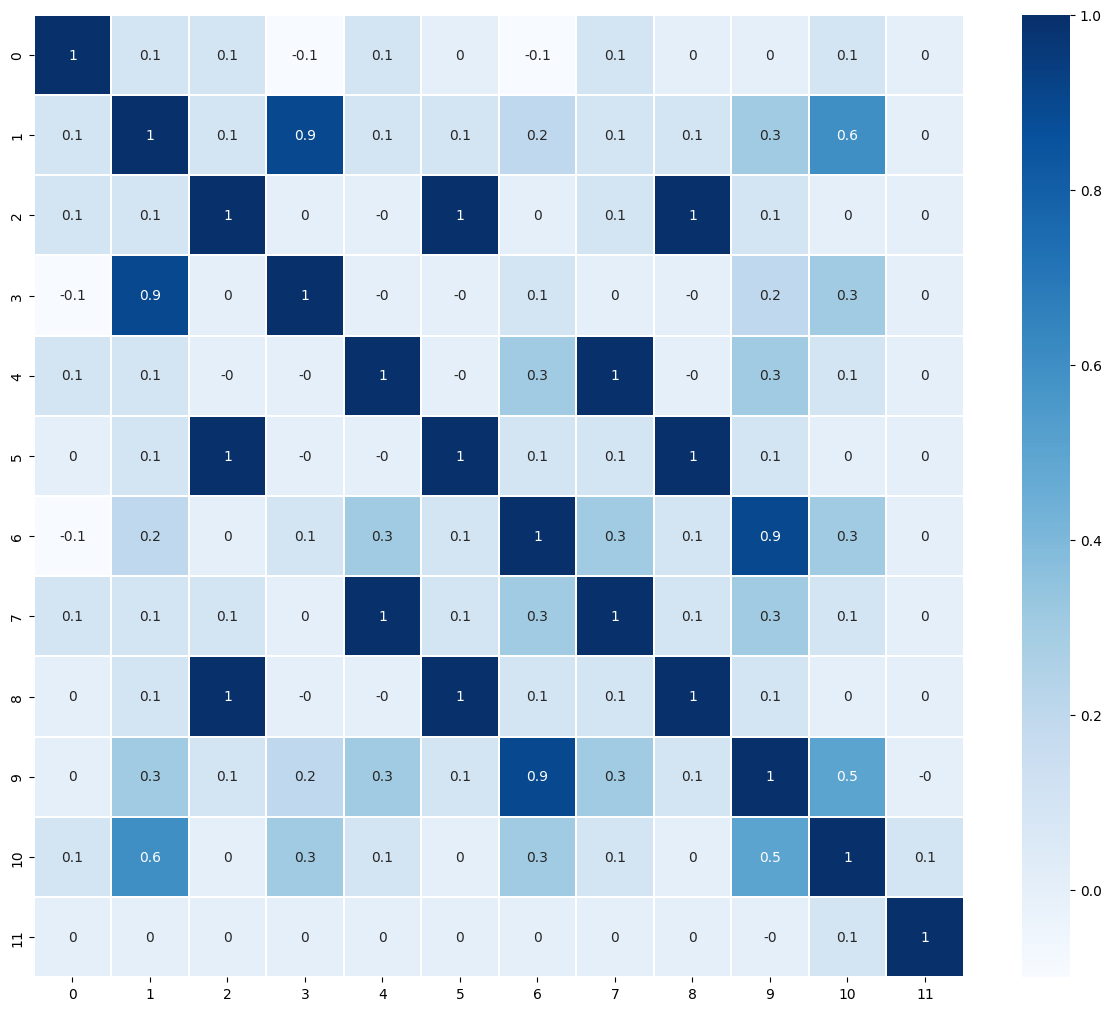

In [ ]:
corr = df_spark.corr()
f, ax = plt.subplots(figsize=(15,12.5))
cmap = sns.diverging_palette(150, 240, s=120, l=55, as_cmap=True)
sns.heatmap(round(corr, 1), annot=True,cmap='Blues',linewidth=0.1)

In [ ]:
from fastcore.test import test_eq
from fastcore.basics import first
from fastai.data.external import untar_data, URLs
from fastai.tabular.data import TabularDataLoaders
from fastai.tabular.core import Categorify, FillMissing
from fastai.data.transforms import Normalize
import pandas as pd

In [ ]:
from tsai.all import *

In [ ]:
gMLP

tsai.models.gMLP.gMLP

In [ ]:
GatedTabTransformer

tsai.models.GatedTabTransformer.GatedTabTransformer

In [ ]:
df_spark

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0000
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0000
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0000
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0000
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
357936,7.0,25.0,46.0,2.0,15.0,46.0,4.0,15.0,92.0,9.0,1.0,20.3479
357937,7.0,82.0,14.0,7.0,10.0,8.0,0.0,10.0,16.0,2.0,1.0,9.0000
357938,7.0,82.0,14.0,7.0,10.0,8.0,0.0,10.0,17.0,3.0,1.0,1.0000
357939,7.0,30.0,62.0,2.0,20.0,61.0,3.0,20.0,122.0,5.0,1.0,0.0000


In [ ]:
dls = TabularDataLoaders.from_csv('/content/drive/MyDrive/ml_iot/DF_Spark2.csv', y_names="0",
    cont_names = ['1', '2', '3', '4', '5', '6','7','8','9','10','11'],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
model = GatedTabTransformer(dls.classes, dls.cont_names, dls.c)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, amsgrad=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

In [ ]:
for epoch in range(1):
    running_loss = 0.0

    for i, batch in enumerate(dls.train):

        x_cat, x_cont, yb = batch

        optimizer.zero_grad()
        out = model(x_cat, x_cont)
        loss = criterion(out, yb.squeeze().to(dtype=torch.long))

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 20 == 19:
            print('[%d, %6d] loss: %.6f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

    scheduler.step()

IndexError: ignored

In [ ]:
!git clone https://github.com/CahidArda/tab-transformer-keras.git

Cloning into 'tab-transformer-keras'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 26 (delta 8), reused 22 (delta 6), pack-reused 0
Receiving objects: 100% (26/26), 91.95 KiB | 5.75 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
%cd tab-transformer-keras

/content/tab-transformer-keras


In [ ]:
import pandas as pd
from tab_transformer_keras import TabTransformer
from misc import get_X_from_features

# df = pd.read_csv('data.csv')

cat_features  = ['0']
cont_features = ['1', '2', '3', '4', '5', '6','7','8','9','10','11']

X = get_X_from_features(df_spark, cont_features, cat_features)


In [ ]:
X

[           1     2    3     4     5    6     7      8    9   10       11
 0       21.0  30.0  2.0   3.0  30.0  2.0   3.0   59.0  7.0  2.0   0.0000
 1       32.0  70.0  2.0   4.0  68.0  2.0   4.0  134.0  7.0  2.0   0.0000
 2       15.0   1.0  2.0   2.0   0.0  2.0   2.0    0.0  7.0  2.0   0.0000
 3       33.0  77.0  2.0   7.0  73.0  2.0   7.0  144.0  7.0  2.0   0.0000
 4       55.0  78.0  3.0   7.0  74.0  3.0   7.0  146.0  8.0  2.0   0.0000
 ...      ...   ...  ...   ...   ...  ...   ...    ...  ...  ...      ...
 357936  25.0  46.0  2.0  15.0  46.0  4.0  15.0   92.0  9.0  1.0  20.3479
 357937  82.0  14.0  7.0  10.0   8.0  0.0  10.0   16.0  2.0  1.0   9.0000
 357938  82.0  14.0  7.0  10.0   8.0  0.0  10.0   17.0  3.0  1.0   1.0000
 357939  30.0  62.0  2.0  20.0  61.0  3.0  20.0  122.0  5.0  1.0   0.0000
 357940  30.0  62.0  2.0  20.0  62.0  4.0  20.0  123.0  9.0  1.0  20.4131
 
 [357941 rows x 11 columns],
 0         7.0
 1         7.0
 2         7.0
 3         7.0
 4         7.0
      

In [ ]:
# Counter({7.0: 347924,
#          4.0: 1547,
#          3.0: 805,
#          0.0: 5780,
#          5.0: 532,
#          1.0: 342,
#          6.0: 122,
#          2.0: 889})
tabTransformer = TabTransformer(
    categories = [5780, 342,889,805,1547, 532, 122, 347924], # number of unique elements in each categorical feature
    num_continuous = 11,      # number of numerical features
    dim = 16,                # embedding/transformer dimension
    dim_out = 1,             # dimension of the model output
    depth = 6,               # number of transformer layers in the stack
    heads = 8,               # number of attention heads
    attn_dropout = 0.1,      # attention layer dropout in transformers
    ff_dropout = 0.1,        # feed-forward layer dropout in transformers
    mlp_hidden = [(32, 'relu'), (16, 'relu')] # mlp layer dimensions and activations
)

pred = tabTransformer.predict(X)

11186/11186 [==============================] - 115s 10ms/step


In [ ]:
pred

array([[-0.93307024],
       [-0.9234047 ],
       [-2.556221  ],
       ...,
       [-1.6023073 ],
       [-0.93397903],
       [-0.86373824]], dtype=float32)